# Support Vector Regression (SVR)

## Importing the libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [38]:
dataset = pd.read_csv('tvmarketing.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
#want both vars in column format rather than row for input to the algorithm 
y = y.reshape(len(y),1)

In [39]:
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [40]:
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
# For SVR we want to scale both X and y so that they're in similar scales (case-by-case)
# We need different scalers for both X and y - these will be used below to predict a new data result
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [42]:
print(X)

[[ 0.96985227]
 [-1.19737623]
 [-1.51615499]
 [ 0.05204968]
 [ 0.3941822 ]
 [-1.61540845]
 [-1.04557682]
 [-0.31343659]
 [-1.61657614]
 [ 0.61604287]
 [-0.94515567]
 [ 0.79002835]
 [-1.4390876 ]
 [-0.57850171]
 [ 0.66625345]
 [ 0.56466461]
 [-0.92530498]
 [ 1.56887609]
 [-0.90895735]
 [ 0.0030068 ]
 [ 0.8332328 ]
 [ 1.05509347]
 [-1.5628625 ]
 [ 0.94883389]
 [-0.98952781]
 [ 1.35285385]
 [-0.04837147]
 [ 1.08662104]
 [ 1.18820988]
 [-0.89260972]
 [ 1.70316018]
 [-0.3986778 ]
 [-0.58200477]
 [ 1.38438142]
 [-0.59952009]
 [ 1.67747105]
 [ 1.39956136]
 [-0.84473452]
 [-1.21372386]
 [ 0.94533082]
 [ 0.64757044]
 [ 0.34981006]
 [ 1.711334  ]
 [ 0.6989487 ]
 [-1.42390765]
 [ 0.327624  ]
 [-0.66958136]
 [ 1.08428567]
 [ 0.93598932]
 [-0.93581417]
 [ 0.61604287]
 [-0.54463877]
 [ 0.80987904]
 [ 0.41520058]
 [ 1.35051848]
 [ 0.60553368]
 [-1.63175608]
 [-0.12660655]
 [ 0.74448853]
 [ 0.74332084]
 [-1.09228433]
 [ 1.33417085]
 [ 1.07727954]
 [-0.51778195]
 [-0.18615862]
 [-0.91129272]
 [-1.34917

In [43]:
print(y)

[[ 1.55205313]
 [-0.69604611]
 [-0.90740587]
 [ 0.86033029]
 [-0.21568303]
 [-1.31091086]
 [-0.42704278]
 [-0.15803946]
 [-1.77205942]
 [-0.65761706]
 [-1.04190753]
 [ 0.64897053]
 [-0.92662039]
 [-0.83054778]
 [ 0.9564029 ]
 [ 1.6096967 ]
 [-0.29254112]
 [ 1.99398717]
 [-0.5231154 ]
 [ 0.11096387]
 [ 0.76425767]
 [-0.29254112]
 [-1.61834324]
 [ 0.28389458]
 [-0.83054778]
 [-0.38861374]
 [ 0.18782197]
 [ 0.36075268]
 [ 0.93718838]
 [-0.67683159]
 [ 1.41755147]
 [-0.40782826]
 [-0.8497623 ]
 [ 0.64897053]
 [-0.86897682]
 [-0.23489755]
 [ 2.1861324 ]
 [ 0.1301784 ]
 [-0.75368968]
 [ 1.43676599]
 [ 0.49525434]
 [ 0.59132696]
 [ 1.2830498 ]
 [-0.21568303]
 [-1.06112206]
 [ 0.16860744]
 [-0.65761706]
 [ 1.76341289]
 [ 0.14939292]
 [-0.83054778]
 [-0.50390088]
 [-0.63840254]
 [ 1.64812575]
 [ 1.37912242]
 [ 1.18697718]
 [ 1.8594855 ]
 [-1.63755776]
 [-0.15803946]
 [ 1.87870003]
 [ 0.84111576]
 [-1.13798015]
 [ 1.95555812]
 [ 0.32232363]
 [-0.00432327]
 [ 0.76425767]
 [-0.90740587]
 [-0.86897

## Training the SVR model on the whole dataset

In [44]:
from sklearn.svm import SVR
# RBF is a Gaussian kernel that is very widely used, and is a good starting point
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y.ravel())

SVR()

## Predicting a new result

In [45]:
# Since you scaled y up above, you need to inverse the transformation in order to get the result in original units
sc_y.inverse_transform([regressor.predict(sc_x.transform([[100]]))])

array([[11.77225777]])

## Visualising the SVR results

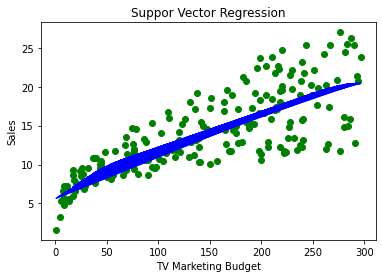

In [46]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color = 'green')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).reshape(len(y),1), color = 'blue')
plt.title('Suppor Vector Regression')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

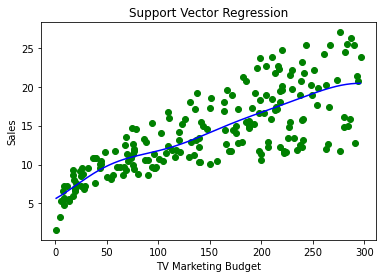

In [47]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'green')
plt.plot(X_grid, sc_y.inverse_transform([regressor.predict(sc_x.transform(X_grid))]).reshape(len(X_grid),1), color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()